In [24]:
!py -m pip install numpy
!py -m pip install matplotlib
!py -m pip install shapely

In [25]:
import numpy as np
import math, random

from math import sqrt, cos, sin, pi, atan2, degrees
from numpy import abs

import matplotlib.pyplot as plt

from typing import List, Tuple

from shapely import affinity, distance
from shapely.geometry import Polygon, Point, LinearRing, LineString
from shapely.plotting import plot_polygon, plot_points, plot_line
from shapely.ops import transform

Creating polygon

Model 5-3

In [44]:
vertices = [(4.0, 0.0), (0.0, 4.0), (-4.0, 0.0), (0.0, -4.0), (4.0, 0.0)]
r, rc, R = 4.0, 4.0/sqrt(2), 1.0
pplg = LinearRing(vertices)

delta = 0.4
steps = int((r-rc)/delta)

Solution

In [45]:
opts = []
n = 10000

ppts = []
ppts.append(Point(pplg.coords[0][0], pplg.coords[0][1]))
for i in reversed(range(len(pplg.coords)-1)):
    ppts.append(Point(pplg.coords[i][0], pplg.coords[i][1]))
cplg = LinearRing(ppts)

for i in range(n):
    phi = (i / n)*2.0*pi
    opts.append(Point(r*cos(phi), r*sin(phi)))
oplg = LinearRing(opts)

# plot_line(oplg, add_points=False, color=(1,0,0), alpha=1)
# plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
# plot_line(cplg, add_points=False, color=(0,0,1), alpha=0.4)

# plt.autoscale()
# plt.show()

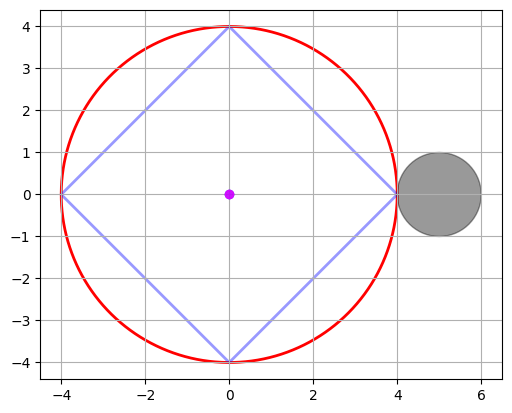

In [46]:
x0, y0, angle = 0.0, 0.0, 0.0
cplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), oplg), angle, origin = (-x0, -y0))
oplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), cplg), angle, origin = (-x0, -y0))
circle = Point(oplgmod.bounds[2]+R, 0.0).buffer(R)

plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplgmod, add_points=False, color=(0,0,1), alpha=0.4)
plot_polygon(circle, add_points=False, color=(0,0,0), alpha=0.4)

plt.autoscale()
plt.show()

In [47]:
def fangle(t):
    return t*2*pi

In [48]:
n = 10000

cpts = []
cptsy = []
opts = []
optsy = []
aang = []
time = []

maxdst = 0.0
maxi = 0
for i in range(n):
    t = i / n
    phi = fangle(t)
    ln = LineString([(x0, y0), (2*r*cos(phi), 2*r*sin(phi))])
    cpt = cplg.intersection(ln)
    opt = oplg.intersection(ln)
    dst = sqrt((opt.x-cpt.x)**2+(opt.y-cpt.y)**2)
    if dst > maxdst:
        maxdst = dst
        maxi = i
    cpts.append(cpt)
    cptsy.append(cpt.y)
    opts.append(opt)
    optsy.append(opt.y)
    aang.append(phi)
    time.append(t)

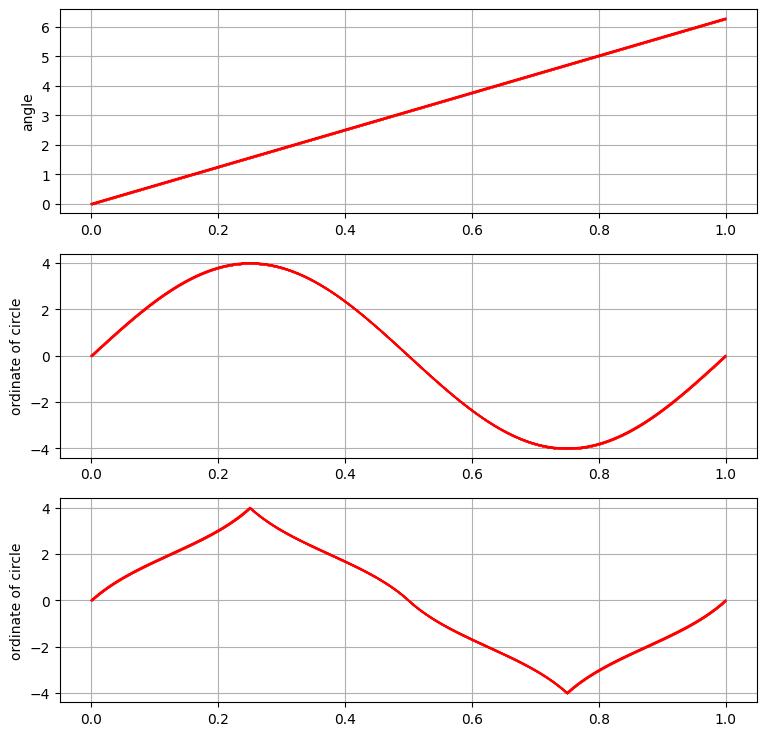

In [49]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(9.0, 9.0)

axs[0].plot(time, aang, marker='.', color="red", markersize=0.1)
axs[0].set_ylabel('angle')
axs[0].grid(True)

axs[1].plot(time, optsy, marker='.', color="red", markersize=0.1)
axs[1].set_ylabel('ordinate of circle')
axs[1].grid(True)

axs[2].plot(time, cptsy, marker='.', color="red", markersize=0.1)
axs[2].set_ylabel('ordinate of circle')
axs[2].grid(True)

In [50]:
plgs = []
ptss = []

lpts = []
ltrcpts = []

for j in range(steps+1):
    if j < steps:
        pt = []
        lpt = []
        ltrcpt = []

        h = delta*(j+1)
        c = 2*sqrt(2*r*h-h**2)
        sn = c/(2*r)
        cs = 1.0-h/r
        ang = atan2(sn, cs)
        if ang < 0:
            ang += 2*pi
        
        ang1 = pi/4.0-ang
        ang2 = pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*0.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*pi/2.0
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x+norm.y*R, pt1.y+norm.x*R))
        ltrcpt.append(Point(pt2.x+norm.y*R, pt2.y+norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))

        ang1 = 3*pi/4.0-ang
        ang2 = 3*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*pi/2.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*pi
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x-norm.y*R, pt1.y-norm.x*R))
        ltrcpt.append(Point(pt2.x-norm.y*R, pt2.y-norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))

        ang1 = 5*pi/4.0-ang
        ang2 = 5*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*pi+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*3*pi/2.0
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x+norm.y*R, pt1.y+norm.x*R))
        ltrcpt.append(Point(pt2.x+norm.y*R, pt2.y+norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))

        ang1 = 7*pi/4.0-ang
        ang2 = 7*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*3*pi/2.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*2*pi
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x-norm.y*R, pt1.y-norm.x*R))
        ltrcpt.append(Point(pt2.x-norm.y*R, pt2.y-norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))
        
        lpts.append(lpt)
        ltrcpts.append(ltrcpt)

        ptss.append(pt)
        plgs.append(LinearRing(pt))
    else:
        pt = []
        lpt = []
        ltrcpt = []
        
        for i in range(len(cpts)):
            pt.append(cpts[i])
            
        ptss.append(pt)
        plgs.append(LinearRing(pt))

        lpt.append(Point(r*cos(0.0), r*sin(0.0)))
        lpt.append(Point(r*cos(pi/2.0), r*sin(pi/2.0)))
        lpt.append(Point(r*cos(pi), r*sin(pi)))
        lpt.append(Point(r*cos(3*pi/2.0), r*sin(3*pi/2.0)))
        lpts.append(lpt)

        ltrcpt.append(Point(r*cos(0.0)+R/sqrt(2), r*sin(0.0)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi/2.0)+R/sqrt(2), r*sin(pi/2.0)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi/2.0)-R/sqrt(2), r*sin(pi/2.0)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi)-R/sqrt(2), r*sin(pi)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi)-R/sqrt(2), r*sin(pi)-R/sqrt(2)))
        ltrcpt.append(Point(r*cos(3*pi/2.0)-R/sqrt(2), r*sin(3*pi/2.0)-R/sqrt(2)))
        ltrcpt.append(Point(r*cos(3*pi/2.0)+R/sqrt(2), r*sin(3*pi/2.0)-R/sqrt(2)))
        ltrcpt.append(Point(r*cos(0.0)+R/sqrt(2), r*sin(0.0)-R/sqrt(2)))
        ltrcpts.append(ltrcpt)
    

In [51]:
ltrcangles = []
for i in range(len(ltrcpts)):
    angles = []
    for j in range(len(ltrcpts[i])):
        angle = atan2(ltrcpts[i][j].y, ltrcpts[i][j].x)
        if angle < 0.0:
            angle += 2.0*pi
        angles.append(angle)
    ltrcangles.append(angles)

In [52]:
ltrcangles[2]

[0.14910618002747694,
 1.4216901467674197,
 1.7199025068223734,
 2.992486473562316,
 3.29069883361727,
 4.563282800357213,
 4.861495160412167,
 6.134079127152109]

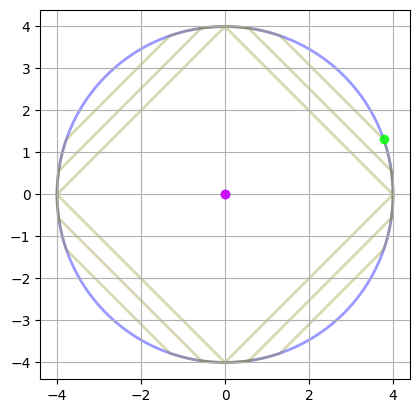

In [53]:
# plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)
# plot_line(cplg, add_points=False, color=(1,0,1), alpha=0.7)
for j in range(steps+1):
    plot_line(plgs[j], add_points=False, color=(0.5,0.5,0), alpha=0.3)

# for j in range(len(lpts)):
#     plot_points(lpts[j], color=(0,1,0), alpha=0.8)

# plot_line(plgs[0], add_points=False, color=(0.5,0.5,0), alpha=0.3)
plot_points(lpts[0][0], color=(0,1,0), alpha=0.8)

plt.show()

In [54]:
trcplgs = []
tangplgs = []

trcptss = []
tangptss = []

for k in range(steps+1):
    if k < steps:
        trcpts = []
        tangpts = []

        for angle in aang:
            
            for i in range(0, 13, 4):
                
                if ltrcangles[k][i] <= angle and angle <= ltrcangles[k][i+1]:
                    # circle
                    ptc = lpts[k][int((i)/2)]
                    anglec = atan2(ptc.y, ptc.x)
                    if anglec < 0.0:
                        anglec += 2.0*pi
                    lr = r*cos(angle-anglec)+sqrt(R**2-(r*sin(angle-anglec))**2)
                    trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                    tangpts.append(ptc)

                if ltrcangles[k][i+1] <= angle and angle <= ltrcangles[k][i+2]:
                    # line
                    x1 = ltrcpts[k][i+1].x
                    x2 = ltrcpts[k][i+2].x
                    y1 = ltrcpts[k][i+1].y
                    y2 = ltrcpts[k][i+2].y
                    norm = sqrt((x2-x1)**2+(y2-y1)**2)
                    nn = Point(-R*(y2-y1)/norm, R*(x2-x1)/norm)
                    lr = ((x2-x1)*y1-(y2-y1)*x1)/((x2-x1)*sin(angle)-(y2-y1)*cos(angle))
                    trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                    tangpts.append(Point(lr*cos(angle)+nn.x, lr*sin(angle)+nn.y))

                if ltrcangles[k][i+2] <= angle and angle <= ltrcangles[k][i+3]:
                    # circle
                    ptc = lpts[k][int((i+3)/2)]
                    anglec = atan2(ptc.y, ptc.x)
                    if anglec < 0.0:
                        anglec += 2.0*pi
                    lr = r*cos(angle-anglec)+sqrt(R**2-(r*sin(angle-anglec))**2)
                    trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                    tangpts.append(ptc)
            
                if ltrcangles[k][i+3] <= angle:

                    if i+4 == len(ltrcangles[k]):
                        fin_angle = ltrcangles[k][0]+2*pi
                    else:
                        fin_angle = ltrcangles[k][i+4]

                    if angle <= fin_angle:
                        # circle
                        trcpts.append(Point((r+R)*cos(angle), (r+R)*sin(angle)))
                        tangpts.append(Point((r)*cos(angle), (r)*sin(angle)))
                    
            if angle <= ltrcangles[k][0]:
                # circle
                trcpts.append(Point((r+R)*cos(angle), (r+R)*sin(angle)))
                tangpts.append(Point((r)*cos(angle), (r)*sin(angle)))

        trcplgs.append(LinearRing(trcpts))
        tangplgs.append(LinearRing(tangpts))

        trcptss.append(trcpts)
        tangptss.append(tangpts)
    else:
        trcpts = []
        tangpts = []

        for angle in aang:
        
            for i in range(0, 7, 2):

                if ltrcangles[k][i] <= angle and angle <= ltrcangles[k][i+1]:
                    # line
                    x1 = ltrcpts[k][i].x
                    x2 = ltrcpts[k][i+1].x
                    y1 = ltrcpts[k][i].y
                    y2 = ltrcpts[k][i+1].y
                    norm = sqrt((x2-x1)**2+(y2-y1)**2)
                    nn = Point(-R*(y2-y1)/norm, R*(x2-x1)/norm)
                    lr = ((x2-x1)*y1-(y2-y1)*x1)/((x2-x1)*sin(angle)-(y2-y1)*cos(angle))
                    trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                    tangpts.append(Point(lr*cos(angle)+nn.x, lr*sin(angle)+nn.y))

                if ltrcangles[k][i+1] <= angle:
                    # circle
                    if i+2 == len(ltrcangles[k]):
                        fin_angle = ltrcangles[k][0]+2*pi
                        
                        ptc = lpts[k][0]
                        anglec = atan2(ptc.y, ptc.x)
                        if anglec < 0.0:
                            anglec += 2.0*pi
                        lr = r*cos(angle-anglec)+sqrt(R**2-(r*sin(angle-anglec))**2)
                        trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                        tangpts.append(ptc)
                    else:
                        fin_angle = ltrcangles[k][i+2]
                        if angle <= fin_angle:
                            ptc = lpts[k][int((i+3)/2)]
                            anglec = atan2(ptc.y, ptc.x)
                            if anglec < 0.0:
                                anglec += 2.0*pi
                            lr = r*cos(angle-anglec)+sqrt(R**2-(r*sin(angle-anglec))**2)
                            trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                            tangpts.append(ptc)

            if angle <= ltrcangles[k][0]:
                ptc = lpts[k][0]
                anglec = atan2(ptc.y, ptc.x)
                if anglec < 0.0:
                    anglec += 2.0*pi
                lr = r*cos(angle-anglec)+sqrt(R**2-(r*sin(angle-anglec))**2)
                trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                tangpts.append(ptc)

        trcplgs.append(LinearRing(trcpts))
        tangplgs.append(LinearRing(tangpts))

        trcptss.append(trcpts)
        tangptss.append(tangpts)



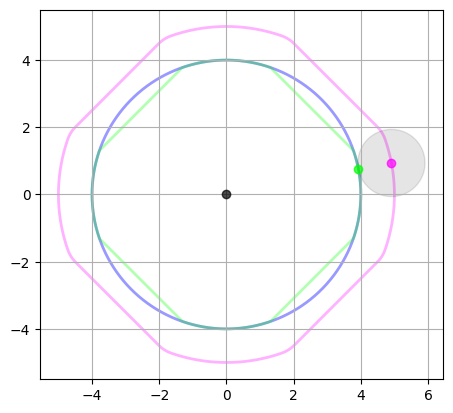

In [55]:
plot_points(Point(0.0, 0.0), color=(0,0,0), alpha=0.7)
plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)

# for j in range(steps+1):
#     plot_line(trcplgs[j], add_points=False, color=(1,0,1), alpha=0.3)

# for j in range(steps+1):
#     plot_line(tangplgs[j], add_points=False, color=(0,1,0), alpha=0.3)

plot_line(trcplgs[0], add_points=False, color=(1,0,1), alpha=0.3)
plot_line(tangplgs[0], add_points=False, color=(0,1,0), alpha=0.3)
# plot_points(tangptss[2], color=(0,1,0), markersize=0.08)

k = 300
plot_points(trcptss[0][k], color=(1,0,1), alpha=0.7)
plot_points(tangptss[0][k], color=(0,1,0), alpha=0.7)

circle = trcptss[0][k].buffer(R)
plot_polygon(circle, add_points=False, color=(0,0,0), alpha=0.1)

In [56]:
# i = 0
# for j in range(0, steps+1):
#     for k in range (1, 10000, 75):
#         plot_points(Point(0.0, 0.0), color=(0,1,0), alpha=0.7)
#         plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)

#         # for j in range(steps+1):
#         #     plot_line(trcplgs[j], add_points=False, color=(1,0,1), alpha=0.3)

#         # for j in range(steps+1):
#         #     plot_line(tangplgs[j], add_points=False, color=(0,1,0), alpha=0.3)

#         plot_line(trcplgs[j], add_points=False, color=(1,0,1), alpha=0.3)
#         # plot_line(tangplgs[j], add_points=False, color=(0,1,0), alpha=0.3)
#         plot_points(tangptss[j], color=(0,1,0), markersize=0.08)

#         plot_points(trcptss[j][k], color=(1,0,1), alpha=0.7)
#         plot_points(tangptss[j][k], color=(0,1,0), alpha=0.7)

#         circle = trcptss[j][k].buffer(R)
#         plot_polygon(circle, add_points=False, color=(0,0,0), alpha=0.1)

#         plt.savefig("test/" + str(i) + ".png")
#         plt.close()
#         i += 1

In [57]:
ln = LineString([(0.0, 0.0), (100.0, 0.0)])
ttime = []
dlttang = []
dltcent = []
n = 1000

for j in range(0, steps+1):
    for i in range(len(time)-2):
        t1 = time[i]
        t2 = time[i+1]
        pttang1 = tangptss[j][i]
        ptcent1 = trcptss[j][i]
        pttang2 = tangptss[j][i+1]
        ptcent2 = trcptss[j][i+1]
        dsttang = sqrt((pttang2.x-pttang1.x)**2+(pttang2.y-pttang1.y)**2)
        dstcent = sqrt((ptcent2.x-ptcent1.x)**2+(ptcent2.y-ptcent1.y)**2)
        dlttang.append(dsttang/(t2-t1))
        dltcent.append(dstcent/(t2-t1))
        ttime.append(time[i]+j)

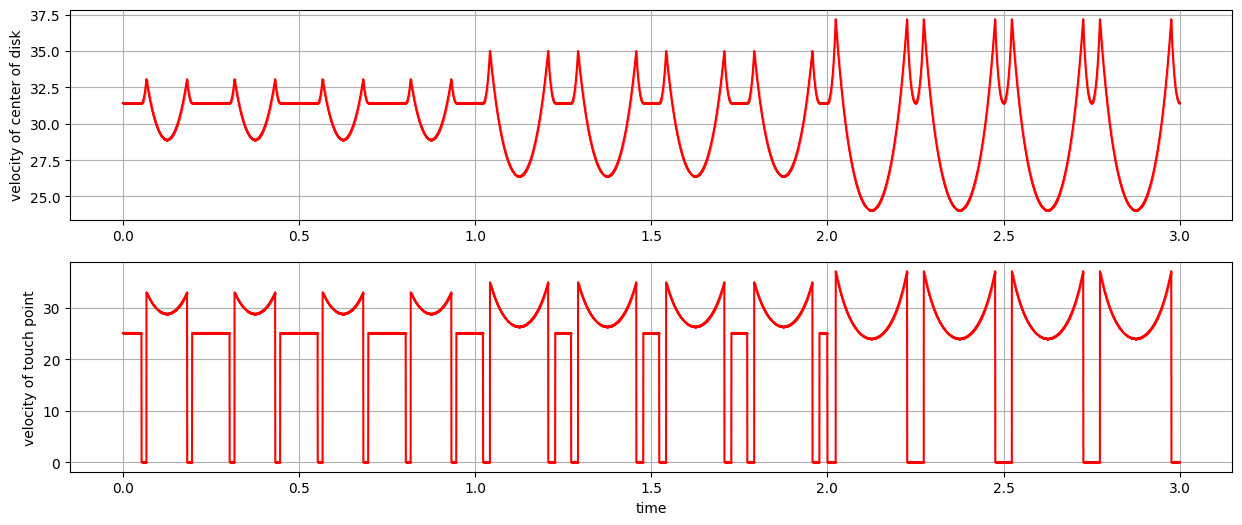

In [58]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15.0, 6.0)

axs[0].plot(ttime, dltcent, marker='.', color="red", markersize=0.1)
axs[0].set_ylabel('velocity of center of disk')
axs[0].grid(True)

axs[1].plot(ttime, dlttang, marker='.', color="red", markersize=0.1)
axs[1].set_xlabel('time')
axs[1].set_ylabel('velocity of touch point')
axs[1].grid(True)

In [67]:
stop_nums = [141, 197, 226]
n = 10000

dsts = []
for k in range(steps+1):
    dst = []
    if k < steps:
       for i in range(0, 7, 2):
            dst.append(sqrt((lpts[k][i+1].x-lpts[k][i].x)**2+(lpts[k][i+1].y-lpts[k][i].y)**2))

            if i+2 == len(lpts[k]):
                fin_pt = lpts[k][0]
            else:
                fin_pt = lpts[k][i+2]

            dst.append(sqrt((fin_pt.x-lpts[k][i+1].x)**2+(fin_pt.y-lpts[k][i+1].y)**2))
    else:
        dst.append(sqrt((lpts[k][1].x-lpts[k][0].x)**2+(lpts[k][1].y-lpts[k][0].y)**2))
        dst.append(sqrt((lpts[k][2].x-lpts[k][1].x)**2+(lpts[k][2].y-lpts[k][1].y)**2))
        dst.append(sqrt((lpts[k][3].x-lpts[k][2].x)**2+(lpts[k][3].y-lpts[k][2].y)**2))
        dst.append(sqrt((lpts[k][0].x-lpts[k][3].x)**2+(lpts[k][0].y-lpts[k][3].y)**2))
    dsts.append(dst)

sums = []

for k in range(steps+1):
    sum = 0
    for i in range(len(dsts[k])):
        sum += dsts[k][i]
    sums.append(sum)

for k in range(steps+1):
    for i in range(len(dsts[k])):
        dsts[k][i] *= (n-8*stop_nums[k])/sums[k]

dsts

[[1265.3418354782784,
  952.6581645217215,
  1265.3418354782784,
  952.6581645217215,
  1265.341835478279,
  952.6581645217203,
  1265.3418354782798,
  952.6581645217212],
 [1704.294041936869,
  401.7059580631305,
  1704.294041936869,
  401.7059580631305,
  1704.294041936869,
  401.7059580631305,
  1704.294041936869,
  401.70595806313065],
 [2048.0, 2048.0, 2048.0000000000005, 2048.0000000000005]]

In [66]:
nums = []
for k in range(steps+1):
    num = []
    if k < steps:
        for i in range(0, 13, 4):
            num.append(int(10000*(ltrcangles[k][i+1] - ltrcangles[k][i])/(2*pi)))
            num.append(int(10000*(ltrcangles[k][i+2] - ltrcangles[k][i+1])/(2*pi)))
            num.append(int(10000*(ltrcangles[k][i+3] - ltrcangles[k][i+2])/(2*pi)))
        
            if i+4 == len(ltrcangles[k]):
                fin_angle = ltrcangles[k][0]+2*pi
            else:
                fin_angle = ltrcangles[k][i+4]

            num.append(int(10000*(fin_angle - ltrcangles[k][i+3])/(2*pi)))
    else:
        for i in range(0, 7, 2):
            num.append(int(10000*(ltrcangles[k][i+1] - ltrcangles[k][i])/(2*pi)))

            if i+2 == len(ltrcangles[k]):
                fin_angle = ltrcangles[k][0]+2*pi
            else:
                fin_angle = ltrcangles[k][i+2]
            
            num.append(int(10000*(fin_angle - ltrcangles[k][i+1])/(2*pi)))
    nums.append(num)
nums

[[141,
  1153,
  141,
  1064,
  141,
  1153,
  141,
  1064,
  141,
  1153,
  141,
  1064,
  141,
  1153,
  141,
  1064],
 [197,
  1652,
  197,
  451,
  197,
  1652,
  197,
  451,
  197,
  1652,
  197,
  451,
  197,
  1652,
  197,
  451],
 [2025, 474, 2025, 474, 2025, 474, 2025, 474]]

In [75]:
vertnums = []

stp = steps+1

for k in range(stp):
    if k < steps:
        vertnum = []

        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][0])+1)
        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][1]))

        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][2])+1)
        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][3]))

        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][4])+1)
        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][5]))

        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][6])+1)
        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][7]))

        vertnums.append(vertnum)
    else:
        vertnum = []

        vertnum.append(int(dsts[k][0]))
        vertnum.append(2*stop_nums[k])
        vertnum.append(int(dsts[k][1]))
        vertnum.append(2*stop_nums[k])
        vertnum.append(int(dsts[k][2]))
        vertnum.append(2*stop_nums[k])
        vertnum.append(int(dsts[k][3]))
        vertnum.append(2*stop_nums[k])

        vertnums.append(vertnum)

sums = []

for k in range(stp):
    sum = 0
    for i in range(len(vertnums[k])):
        sum += vertnums[k][i]
    sums.append(sum)  

sums

[10000, 10000, 10000]

In [ ]:
plgs = []
ptss = []

for j in range(steps+1):
    if j < steps:
        pt = []

        h = delta*(j+1)
        c = 2*sqrt(2*r*h-h**2)
        sn = c/(2*r)
        cs = 1.0-h/r
        ang = atan2(sn, cs)
        if ang < 0:
            ang += 2*pi
        
        ang1 = pi/4.0-ang
        ang2 = pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(vertnums[j][0]):
            pt.append(pt1)

        for i in range(vertnums[j][1]):
            alpha = i / vertnums[j][1]
            phi = (1.0-alpha)*0.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*pi/2.0
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        
        ang1 = 3*pi/4.0-ang
        ang2 = 3*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*pi/2.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*pi
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        ang1 = 5*pi/4.0-ang
        ang2 = 5*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*pi+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*3*pi/2.0
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        ang1 = 7*pi/4.0-ang
        ang2 = 7*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*3*pi/2.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*2*pi
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        ptss.append(pt)
        plgs.append(LinearRing(pt))
    else:
        pt = []
        
        for i in range(len(cpts)):
            pt.append(cpts[i])
            
        ptss.append(pt)
        plgs.append(LinearRing(pt))